In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Cinsiyet-Performans degerlendırmesı

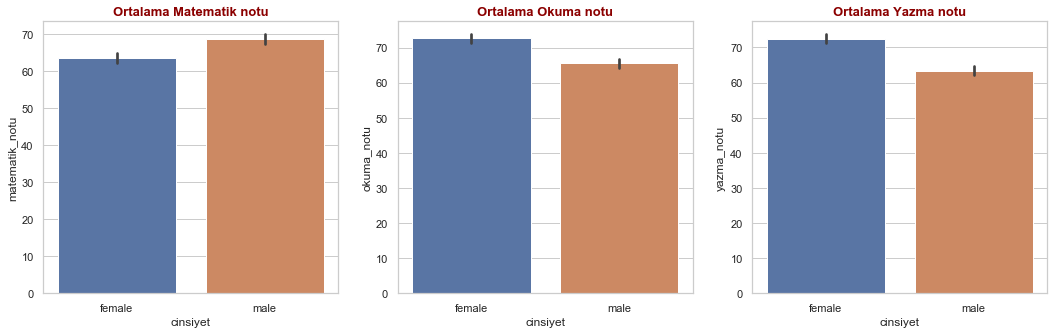

In [6]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("Ortalama Matematik notu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["okuma_notu"])
plt.title("Ortalama Okuma notu", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["yazma_notu"])
plt.title("Ortalama Yazma notu", fontdict = baslik_font)

plt.show()

In [9]:
cinsiyetler = ogrenciler["cinsiyet"].unique()
grup_ogrenciler = ogrenciler.groupby("cinsiyet")

In [10]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(cinsiyetler)):
        for j in range(i+1, len(cinsiyetler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["cinsiyet"]==cinsiyetler[i]][var], 
                                ogrenciler[ogrenciler["cinsiyet"]==cinsiyetler[j]][var])
            grup_1 = cinsiyetler[i]
            grup_2 = cinsiyetler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.383245869828983,0.000000091201855


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,7.959308005187657,0.000000000000005


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,9.979557910004507,0.000000000000000


Köken-Performans degerlendırmesı

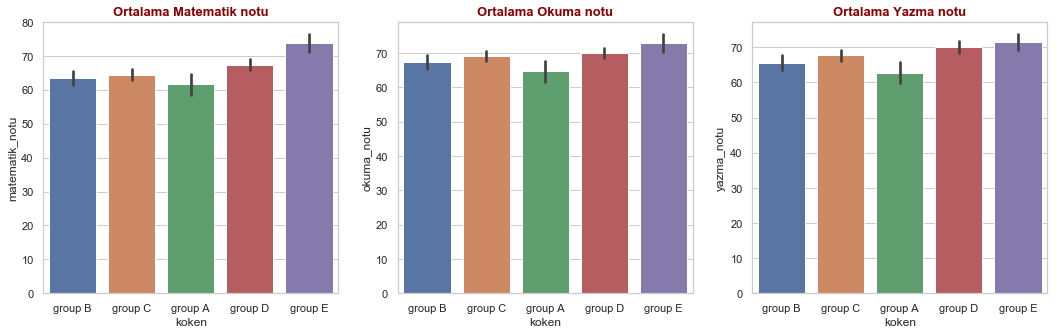

In [11]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("Ortalama Matematik notu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["okuma_notu"])
plt.title("Ortalama Okuma notu", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["koken"], ogrenciler["yazma_notu"])
plt.title("Ortalama Yazma notu", fontdict = baslik_font)

plt.show()

In [13]:
kokenler = ogrenciler["koken"].unique()
grup_ogrenciler = ogrenciler.groupby("koken")

In [14]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(kokenler)):
        for j in range(i+1, len(kokenler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["koken"]==kokenler[i]][var], 
                                ogrenciler[ogrenciler["koken"]==kokenler[j]][var])
            grup_1 = kokenler[i]
            grup_2 = kokenler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


aile_egt_seviyesi-Performans degerlendırmesı


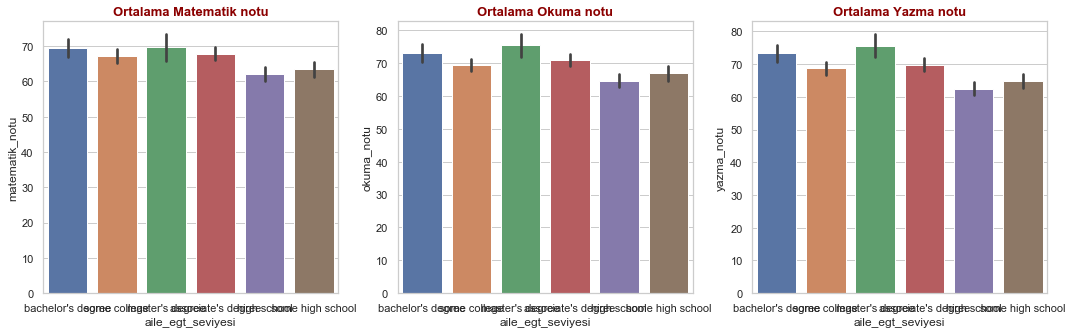

In [15]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["matematik_notu"])
plt.title("Ortalama Matematik notu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["okuma_notu"])
plt.title("Ortalama Okuma notu", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["yazma_notu"])
plt.title("Ortalama Yazma notu", fontdict = baslik_font)

plt.show()

In [16]:
aile_egt_seviyesiler = ogrenciler["aile_egt_seviyesi"].unique()
grup_ogrenciler = ogrenciler.groupby("aile_egt_seviyesi")

In [17]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(aile_egt_seviyesiler)):
        for j in range(i+1, len(aile_egt_seviyesiler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["aile_egt_seviyesi"]==aile_egt_seviyesiler[i]][var], 
                                ogrenciler[ogrenciler["aile_egt_seviyesi"]==aile_egt_seviyesiler[j]][var])
            grup_1 = aile_egt_seviyesiler[i]
            grup_2 = aile_egt_seviyesiler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


2. soru öğle yemeği tipi-Performans degerlendırmesı

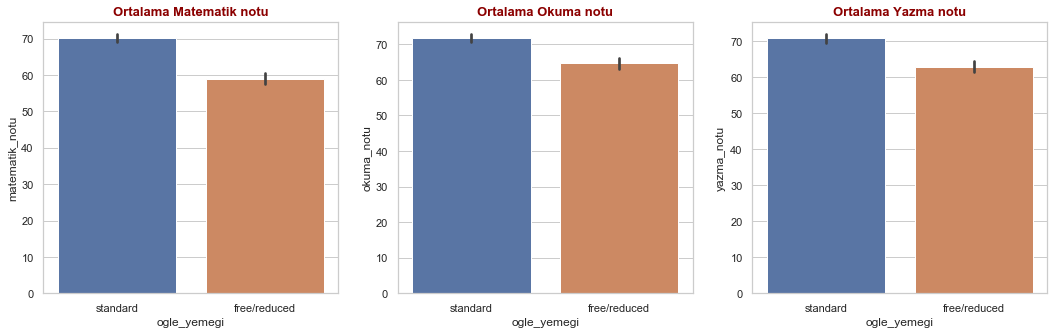

In [18]:

baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["matematik_notu"])
plt.title("Ortalama Matematik notu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["okuma_notu"])
plt.title("Ortalama Okuma notu", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["ogle_yemegi"], ogrenciler["yazma_notu"])
plt.title("Ortalama Yazma notu", fontdict = baslik_font)

plt.show()

In [19]:
ogle_yemegiler = ogrenciler["ogle_yemegi"].unique()
grup_ogrenciler = ogrenciler.groupby("ogle_yemegi")

In [20]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(ogle_yemegiler)):
        for j in range(i+1, len(ogle_yemegiler)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["ogle_yemegi"]==ogle_yemegiler[i]][var], 
                                ogrenciler[ogrenciler["ogle_yemegi"]==ogle_yemegiler[j]][var])
            grup_1 = ogle_yemegiler[i]
            grup_2 = ogle_yemegiler[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,11.837180472914612,0.000000000000000


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,7.451056467473455,0.000000000000200


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,standard,free/reduced,8.009784197834758,0.000000000000003


2. soru hazırlık kursu-Performans degerlendırmesı

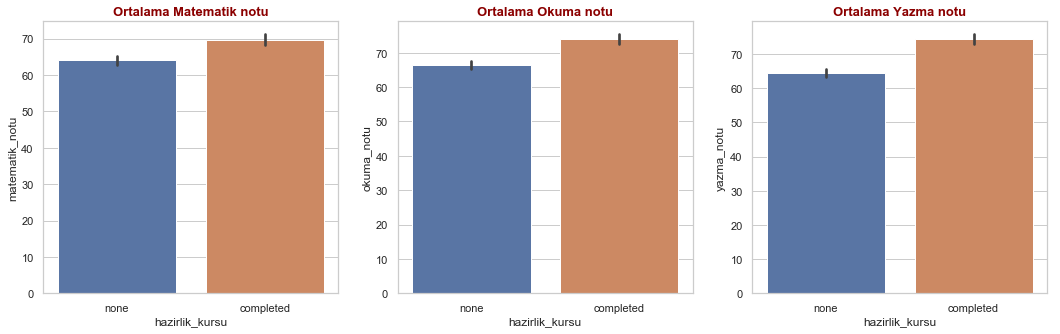

In [21]:

baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["matematik_notu"])
plt.title("Ortalama Matematik notu", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["okuma_notu"])
plt.title("Ortalama Okuma notu", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(ogrenciler["hazirlik_kursu"], ogrenciler["yazma_notu"])
plt.title("Ortalama Yazma notu", fontdict = baslik_font)

plt.show()


In [22]:
hazirlik_kursları = ogrenciler["hazirlik_kursu"].unique()
grup_ogrenciler = ogrenciler.groupby("hazirlik_kursu")

In [24]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["matematik_notu", "okuma_notu", "yazma_notu"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(hazirlik_kursları)):
        for j in range(i+1, len(hazirlik_kursları)):
            ttest = stats.ttest_ind(ogrenciler[ogrenciler["hazirlik_kursu"]==hazirlik_kursları[i]][var], 
                                ogrenciler[ogrenciler["hazirlik_kursu"]==hazirlik_kursları[j]][var])
            grup_1 = hazirlik_kursları[i]
            grup_2 = hazirlik_kursları[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

matematik_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-5.704616417349102,0.000000015359135


okuma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-7.871663538941468,0.000000000000009


yazma_notu için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,none,completed,-10.409173436808748,0.000000000000000


4. soru

In [25]:
korelasyon_mat_ogrenciler = ogrenciler.corr()
display(korelasyon_mat_ogrenciler)

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000000000000,0.817579663672053,0.802642045949807
okuma_notu,0.817579663672053,1.000000000000000,0.954598077146248
yazma_notu,0.802642045949807,0.954598077146248,1.000000000000000


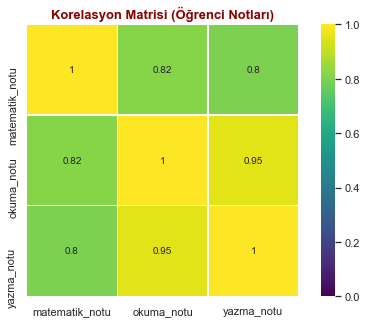

In [26]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,2)
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()

okuma ve yazma dersi arasında yuksek Korelasyon ılıskısı var 
Aslında dırek corr matrixiyle de degerlendirebiliriz cok degısken olmadıgı için

In [27]:
ogrenciler.corr()

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000000000000000,0.817579663672053,0.802642045949807
okuma_notu,0.817579663672053,1.000000000000000,0.954598077146248
yazma_notu,0.802642045949807,0.954598077146248,1.000000000000000
